In [2]:
# Librerías esenciales para entrenamiento y evaluación del modelo
import pandas as pd                                          # Manejo de datasets
import numpy as np                                           # Operaciones numéricas
from xgboost import XGBClassifier                            # Modelo predictivo XGBoost
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Evaluación del modelo
import joblib                                                # Serialización y guardado del modelo entrenado
import os                                                    # Manejo de rutas y archivos
import matplotlib.pyplot as plt                              # Gráficos
import seaborn as sns                                        # Gráficos estadísticos avanzados


In [3]:
# Definimos rutas para datasets procesados
processed_path = "../data/processed/"

# Cargamos datasets previamente guardados
X_train = pd.read_csv(processed_path + 'X_train_scaled.csv')
X_test = pd.read_csv(processed_path + 'X_test_scaled.csv')
y_train = pd.read_csv(processed_path + 'y_train.csv').values.ravel()  # Se convierte en array 1D
y_test = pd.read_csv(processed_path + 'y_test.csv').values.ravel()

# Verificamos la correcta carga de los datos
print("✅ Datos cargados correctamente:")
print(f"Entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Prueba: {X_test.shape}, {y_test.shape}")


✅ Datos cargados correctamente:
Entrenamiento: (4000, 5), (4000,)
Prueba: (1000, 5), (1000,)


In [4]:
# Creación y configuración del modelo XGBoost
modelo_xgb = XGBClassifier(
    objective='binary:logistic',          # Clasificación binaria (fallo/no fallo)
    eval_metric='logloss',                # Métrica de evaluación para optimización
    random_state=42                       # Reproducibilidad del entrenamiento
)

# Entrenamos el modelo usando el dataset de entrenamiento
modelo_xgb.fit(X_train, y_train)

print("✅ Modelo XGBoost entrenado exitosamente.")

✅ Modelo XGBoost entrenado exitosamente.


In [5]:
# Generamos predicciones sobre el conjunto de prueba
y_pred = modelo_xgb.predict(X_test)

# Calculamos métricas clave para evaluar desempeño
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Mostramos resultados claramente
print(f"✅ Precisión del Modelo (Accuracy): {accuracy:.2f}\n")
print("✅ Matriz de Confusión:")
print(conf_matrix, "\n")
print("✅ Reporte detallado de clasificación:")
print(class_report)


✅ Precisión del Modelo (Accuracy): 1.00

✅ Matriz de Confusión:
[[951   2]
 [  0  47]] 

✅ Reporte detallado de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       953
           1       0.96      1.00      0.98        47

    accuracy                           1.00      1000
   macro avg       0.98      1.00      0.99      1000
weighted avg       1.00      1.00      1.00      1000



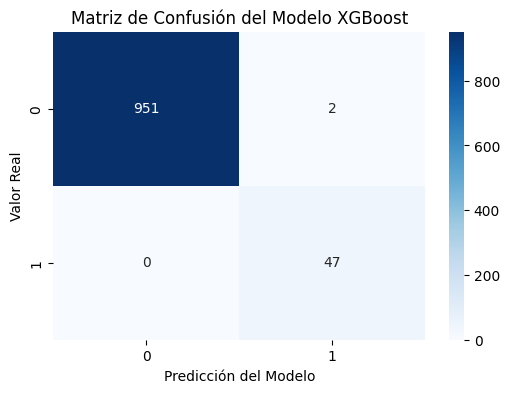

In [6]:
# Gráfica visual de la matriz de confusión para fácil interpretación
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Configuración adicional para claridad
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo XGBoost')
plt.show()
